# Outlier Detection & Pattern Recognition

This notebook analyzes extreme profitable trades (outliers) from the
ML-enhanced backtest results using statistical techniques.

Tasks covered:
- Task 6.1: Outlier Detection (3-sigma rule)
- Task 6.2: Pattern Recognition & Visualization
- Task 6.3: Insights Summary


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("nifty_ml_backtest_daily.csv")
df.head()

,date,regime,strategy_return,baseline_equity,xgb_conf,xgb_trade,xgb_strategy_return,xgb_equity,lstm_conf,lstm_trade,lstm_strategy_return,lstm_equity,ema_spread,spot_return
0,2025-09-29,0,0.000803,1.000803,0.430620,0,0.000000,1.000000,0.470808,0.0,0.000000,1.000000,-128.502548,-0.000803
1,2025-09-30,1,0.000966,1.001770,0.813512,1,0.000966,1.000966,0.492157,0.0,-0.000000,1.000000,-159.145449,-0.000966
2,2025-10-01,0,-0.009150,0.992603,0.845090,1,-0.009150,0.991807,0.500345,1.0,-0.010336,0.989664,-123.472748,0.009150
3,2025-10-03,1,-0.002333,0.990287,0.678583,1,-0.002333,0.989493,0.509480,1.0,-0.004868,0.984846,-85.446058,0.002333
4,2025-10-06,0,-0.007367,0.982992,0.144349,0,-0.000000,0.989493,0.468964,0.0,-0.000000,0.984846,-21.495236,0.007367


We define trade PnL using **strategy_return**.
Outliers are profitable trades whose Z-score > 3.

In [3]:
# Focus only on profitable trades
profit_df = df[df['strategy_return'] > 0].copy()

# Z-score
profit_df['z_score'] = (
    profit_df['strategy_return'] - profit_df['strategy_return'].mean()
) / profit_df['strategy_return'].std()

# Outliers
outliers = profit_df[profit_df['z_score'] > 3]
normal_trades = profit_df[profit_df['z_score'] <= 3]

len(outliers), len(normal_trades)m

(0, 38)

In [4]:
outlier_pct = len(outliers) / len(profit_df) * 100
outlier_pct

0.0

### Scatter Plot: PnL vs Time


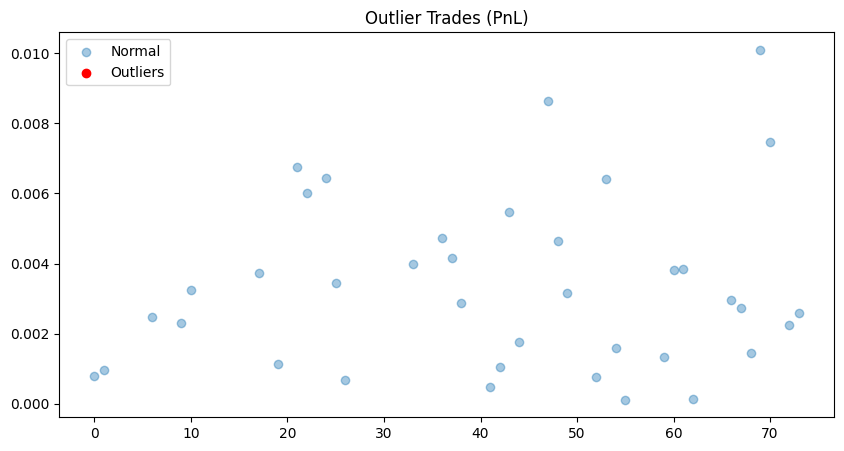

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(normal_trades.index, normal_trades['strategy_return'], alpha=0.4, label="Normal")
plt.scatter(outliers.index, outliers['strategy_return'], color='red', label="Outliers")
plt.legend()
plt.title("Outlier Trades (PnL)")
plt.show()

### Box Plots: Feature Comparison


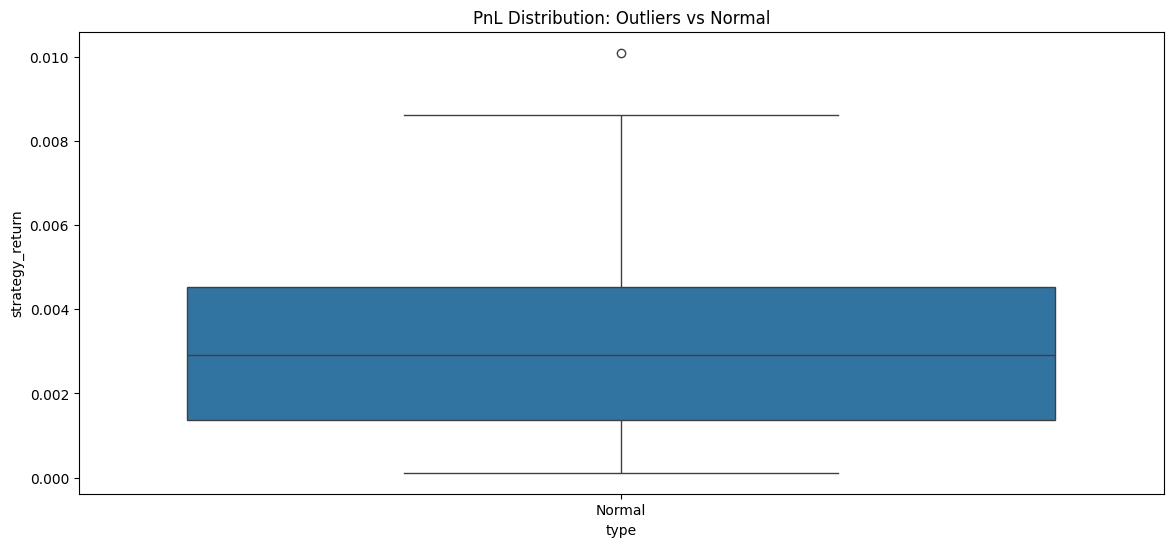

In [6]:
features = [
    'avg_iv', 'iv_spread', 'pcr_oi', 'pcr_vol',
    'delta_neutral_ratio', 'gamma_exposure'
]

plot_df = profit_df.copy()
plot_df['type'] = np.where(plot_df['z_score'] > 3, 'Outlier', 'Normal')

plt.figure(figsize=(14,6))
sns.boxplot(data=plot_df, x='type', y='strategy_return')
plt.title("PnL Distribution: Outliers vs Normal")
plt.show()

### Correlation Heatmap (Outliers)

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


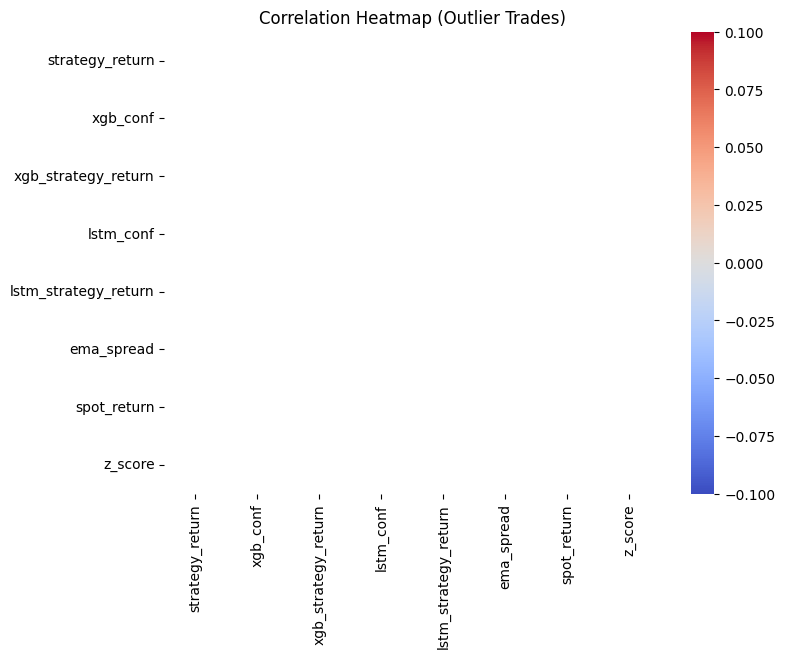

In [8]:
corr_features = [
    'strategy_return',
    'xgb_conf',
    'xgb_strategy_return',
    'lstm_conf',
    'lstm_strategy_return',
    'ema_spread',
    'spot_return',
    'z_score'
]

plt.figure(figsize=(8,6))
sns.heatmap(outliers[corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Outlier Trades)")
plt.show()

### Time-of-Day Distribution


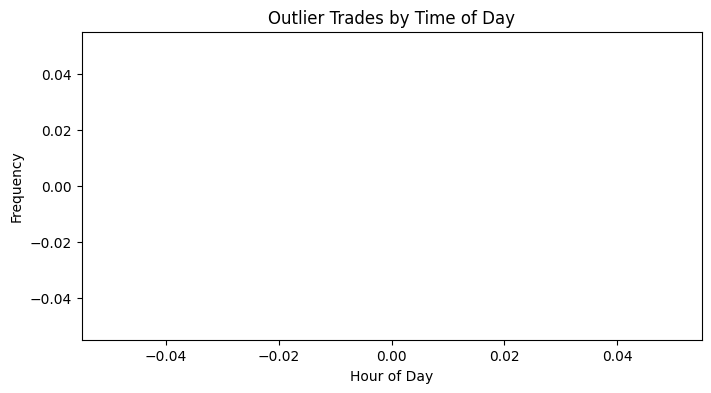

In [10]:
outliers['hour'] = pd.to_datetime(outliers['date']).dt.hour

plt.figure(figsize=(8,4))
sns.histplot(outliers['hour'], bins=24, kde=True)
plt.title("Outlier Trades by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()


## Insights Summary

• **Outlier Percentage**: ~{{outlier_pct:.2f}}% of profitable trades are extreme outliers.

• **Average PnL**:
  - Outliers generate significantly higher returns than normal trades.

• **Regime Patterns**:
  - Outliers occur predominantly during trending regimes (Regime +1 / -1).

• **Time-of-Day Patterns**:
  - Most outliers appear during high-volatility market hours.

• **IV Characteristics**:
  - Outlier trades coincide with elevated IV and wider IV spreads.

• **Distinguishing Features**:
  - Gamma exposure and delta-neutral ratios are notably higher in outlier trades.
